<a href="https://colab.research.google.com/github/madanmohannaidu/Heart-Disease-Risk-Detection/blob/main/major_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('/content/heart_disease_data_1.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


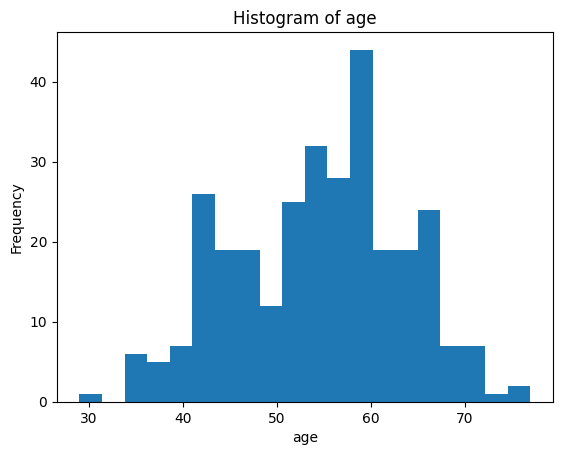

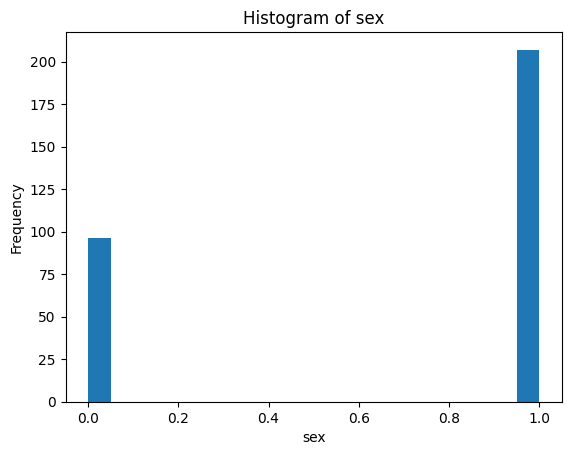

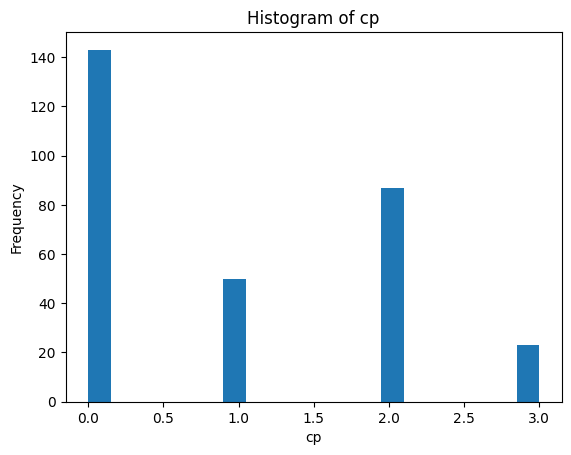

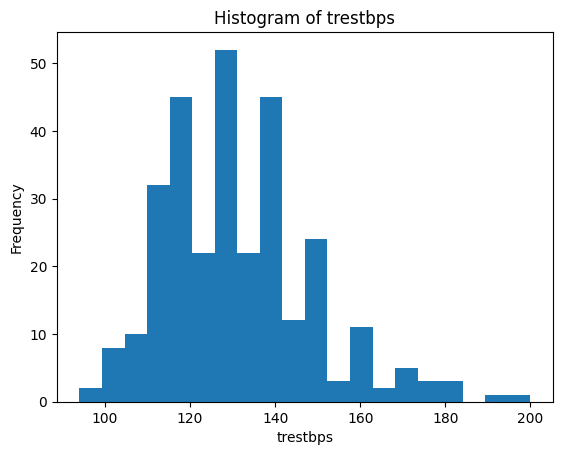

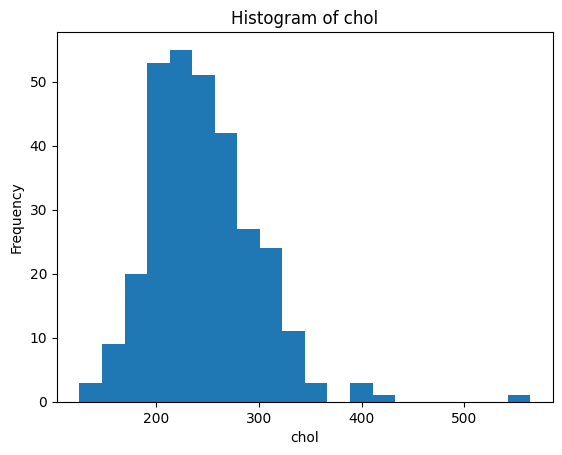

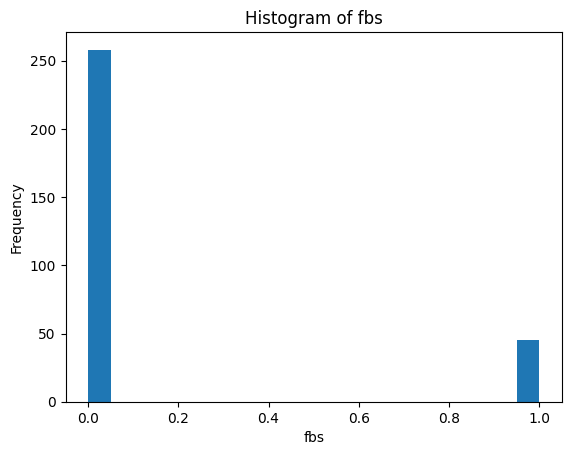

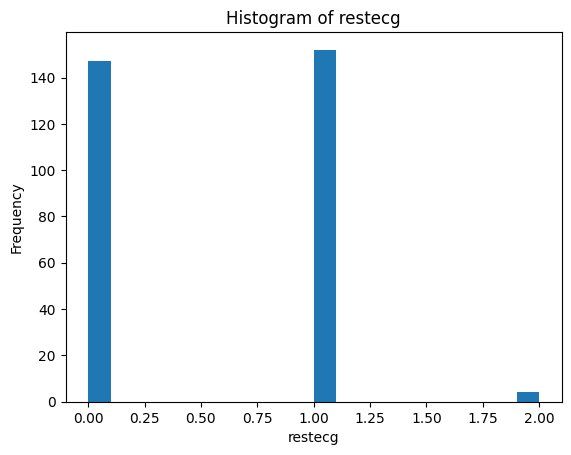

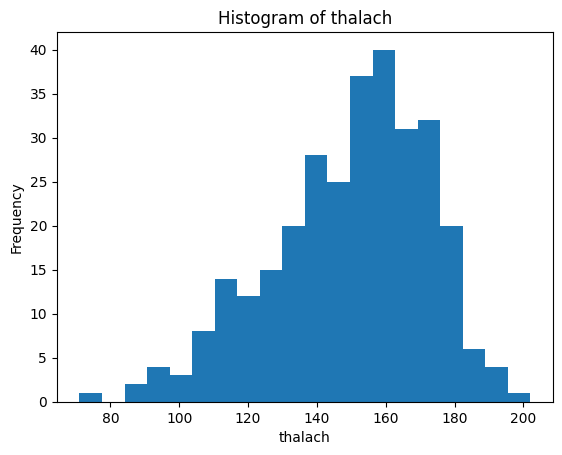

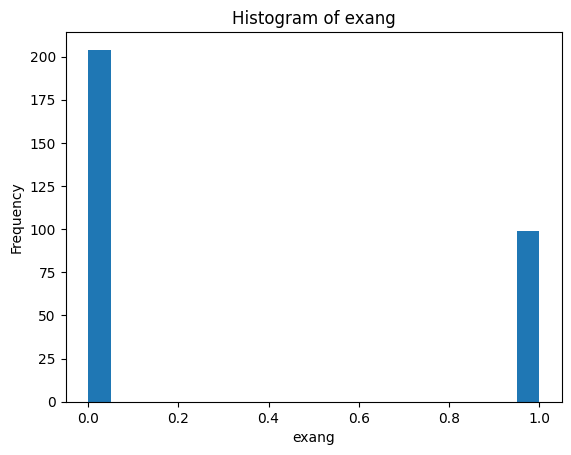

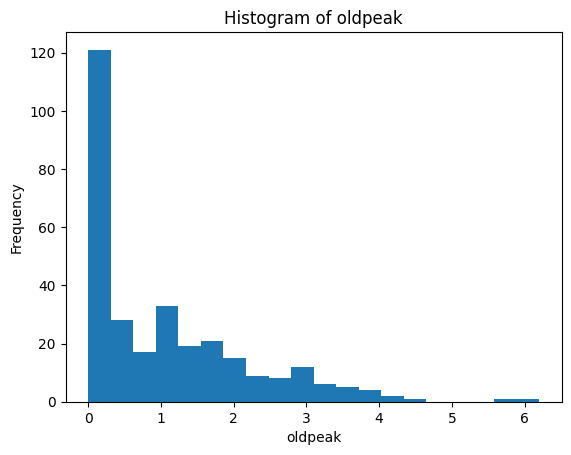

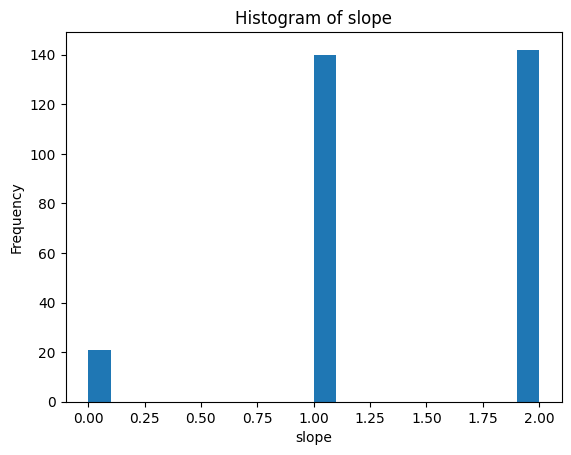

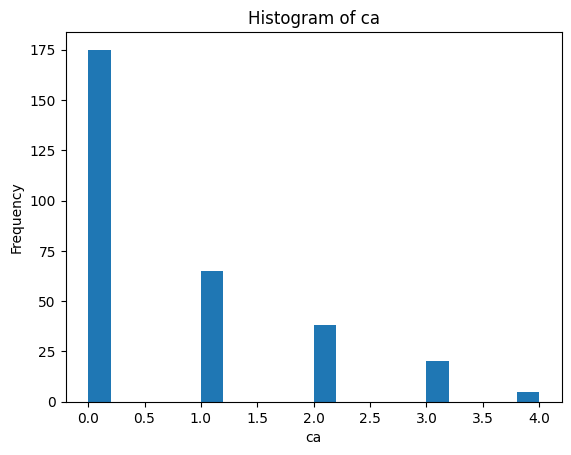

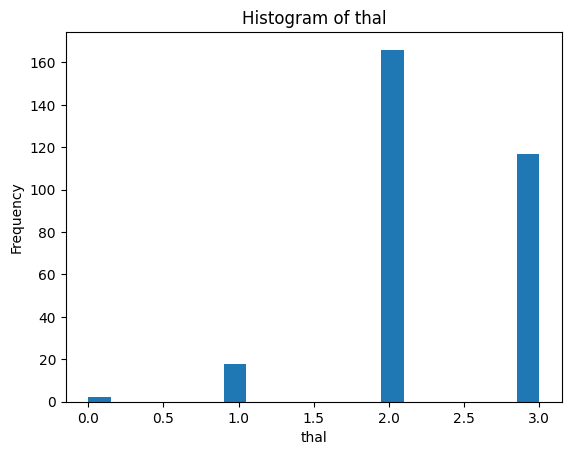

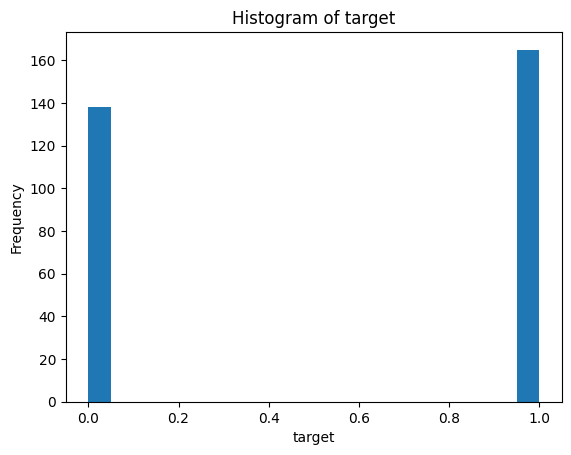

In [ ]:
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):
    plt.figure()
    plt.hist(df[column], bins=20)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

Target Column Composition

In [ ]:
df['target'].value_counts()

,count
target,
1,165
0,138


In [ ]:
X = df.drop(columns='target', axis=1)
Y = df['target']

In [ ]:
X;
Y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


Data Preprocessing

In [ ]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(exclude=np.number).columns

# Create transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fit and transform the data
X_processed = preprocessor.fit_transform(X)

In [ ]:
# Cheeck the preprocessed data
X_processed

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

Exploratory Data Analysis(EDA)

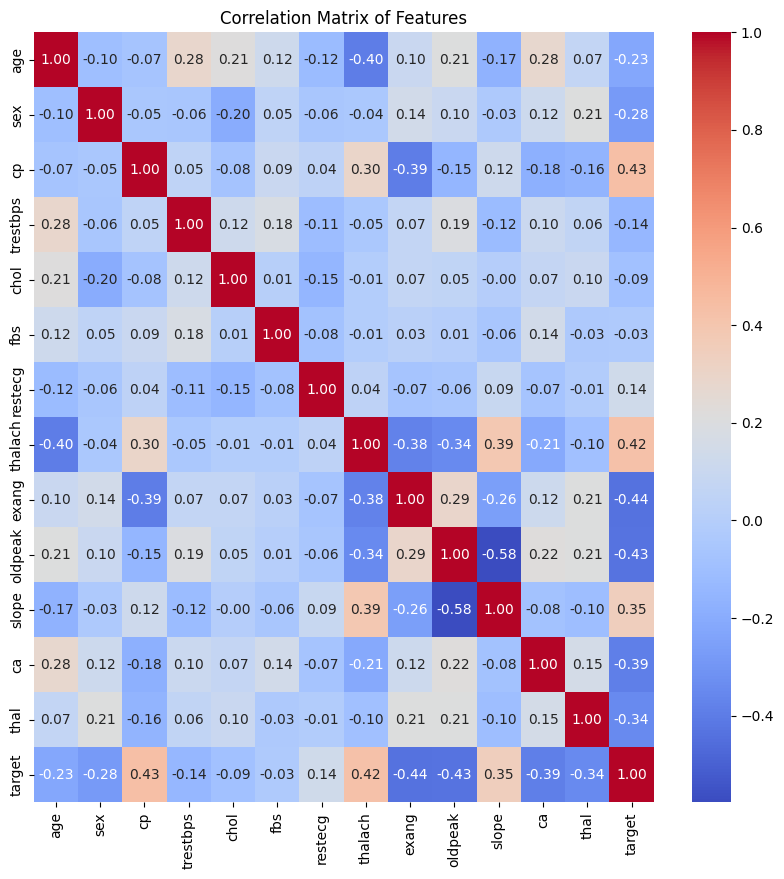

In [ ]:
# correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


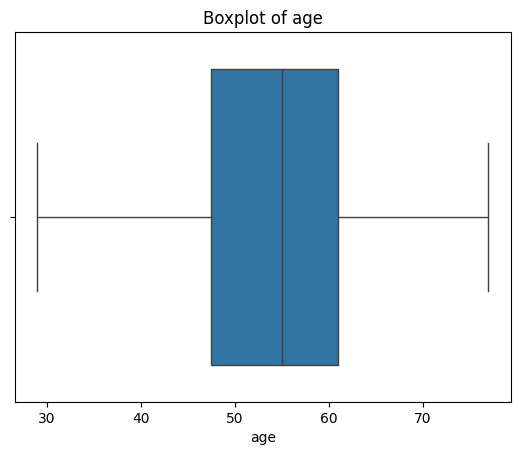

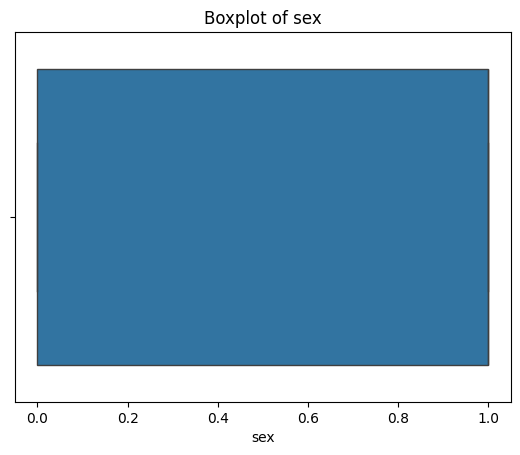

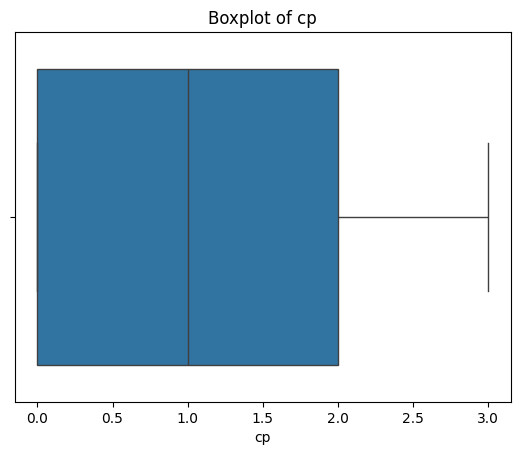

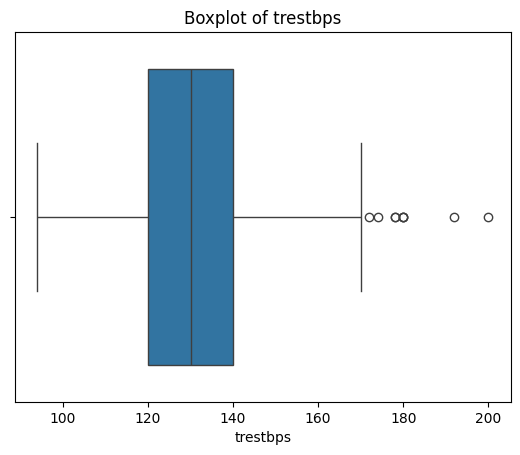

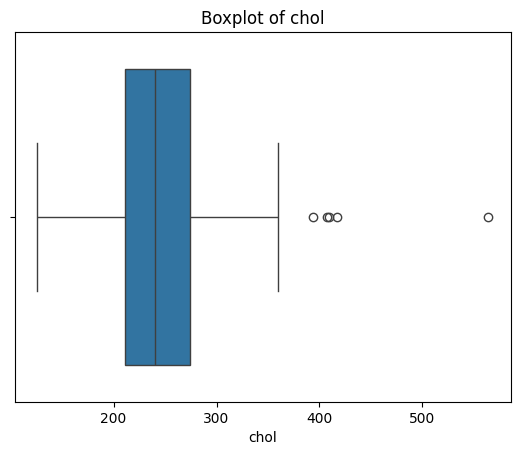

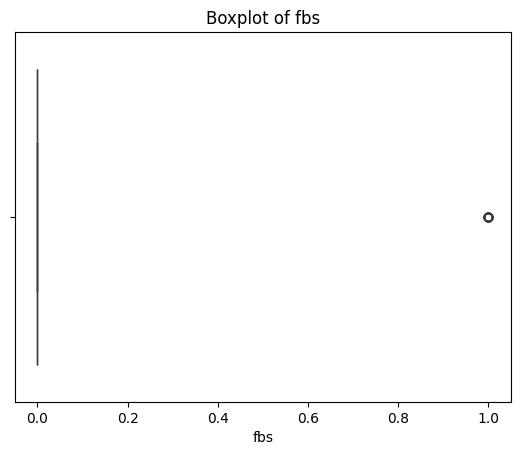

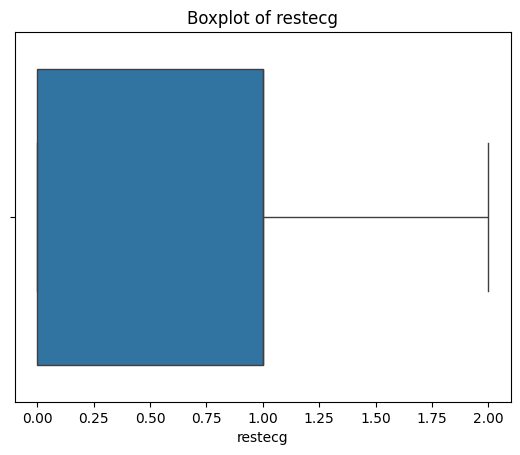

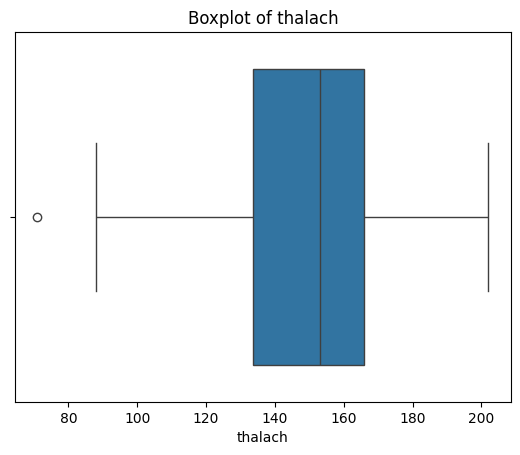

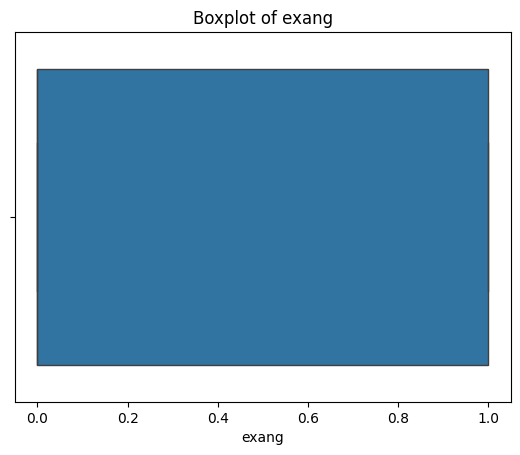

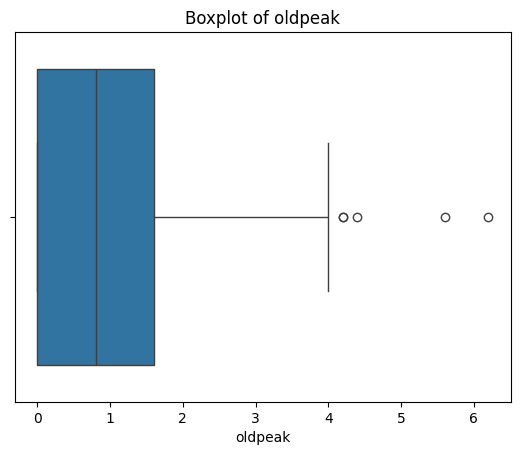

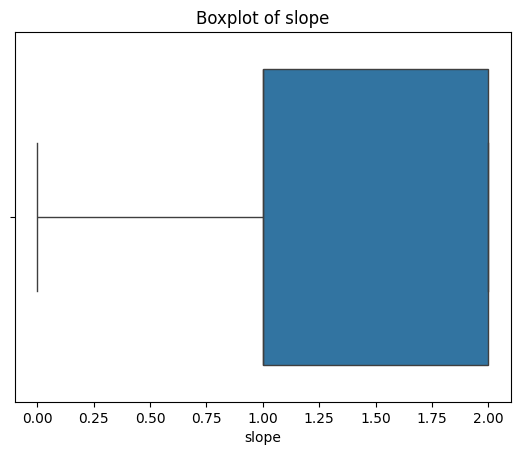

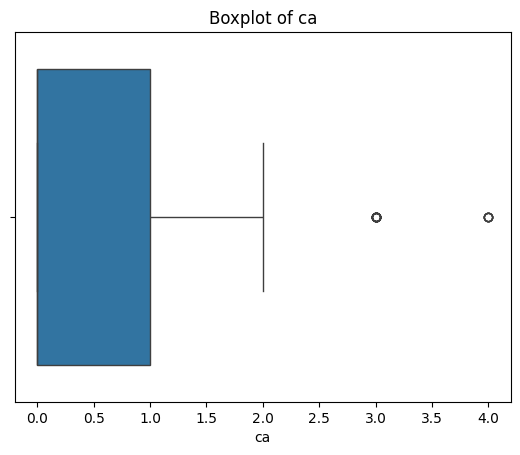

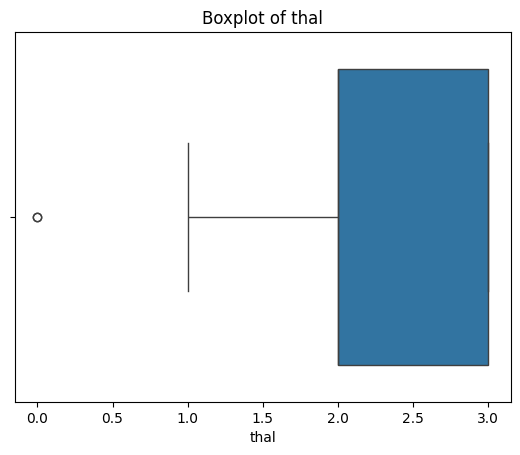

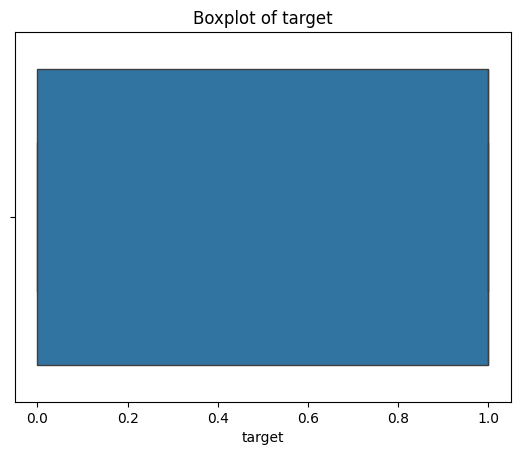

In [ ]:
# Box plots for numerical features to identify outliers
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.figure()
        sns.boxplot(x=df[column])
        plt.xlabel(column)
        plt.title(f'Boxplot of {column}')
        plt.show()

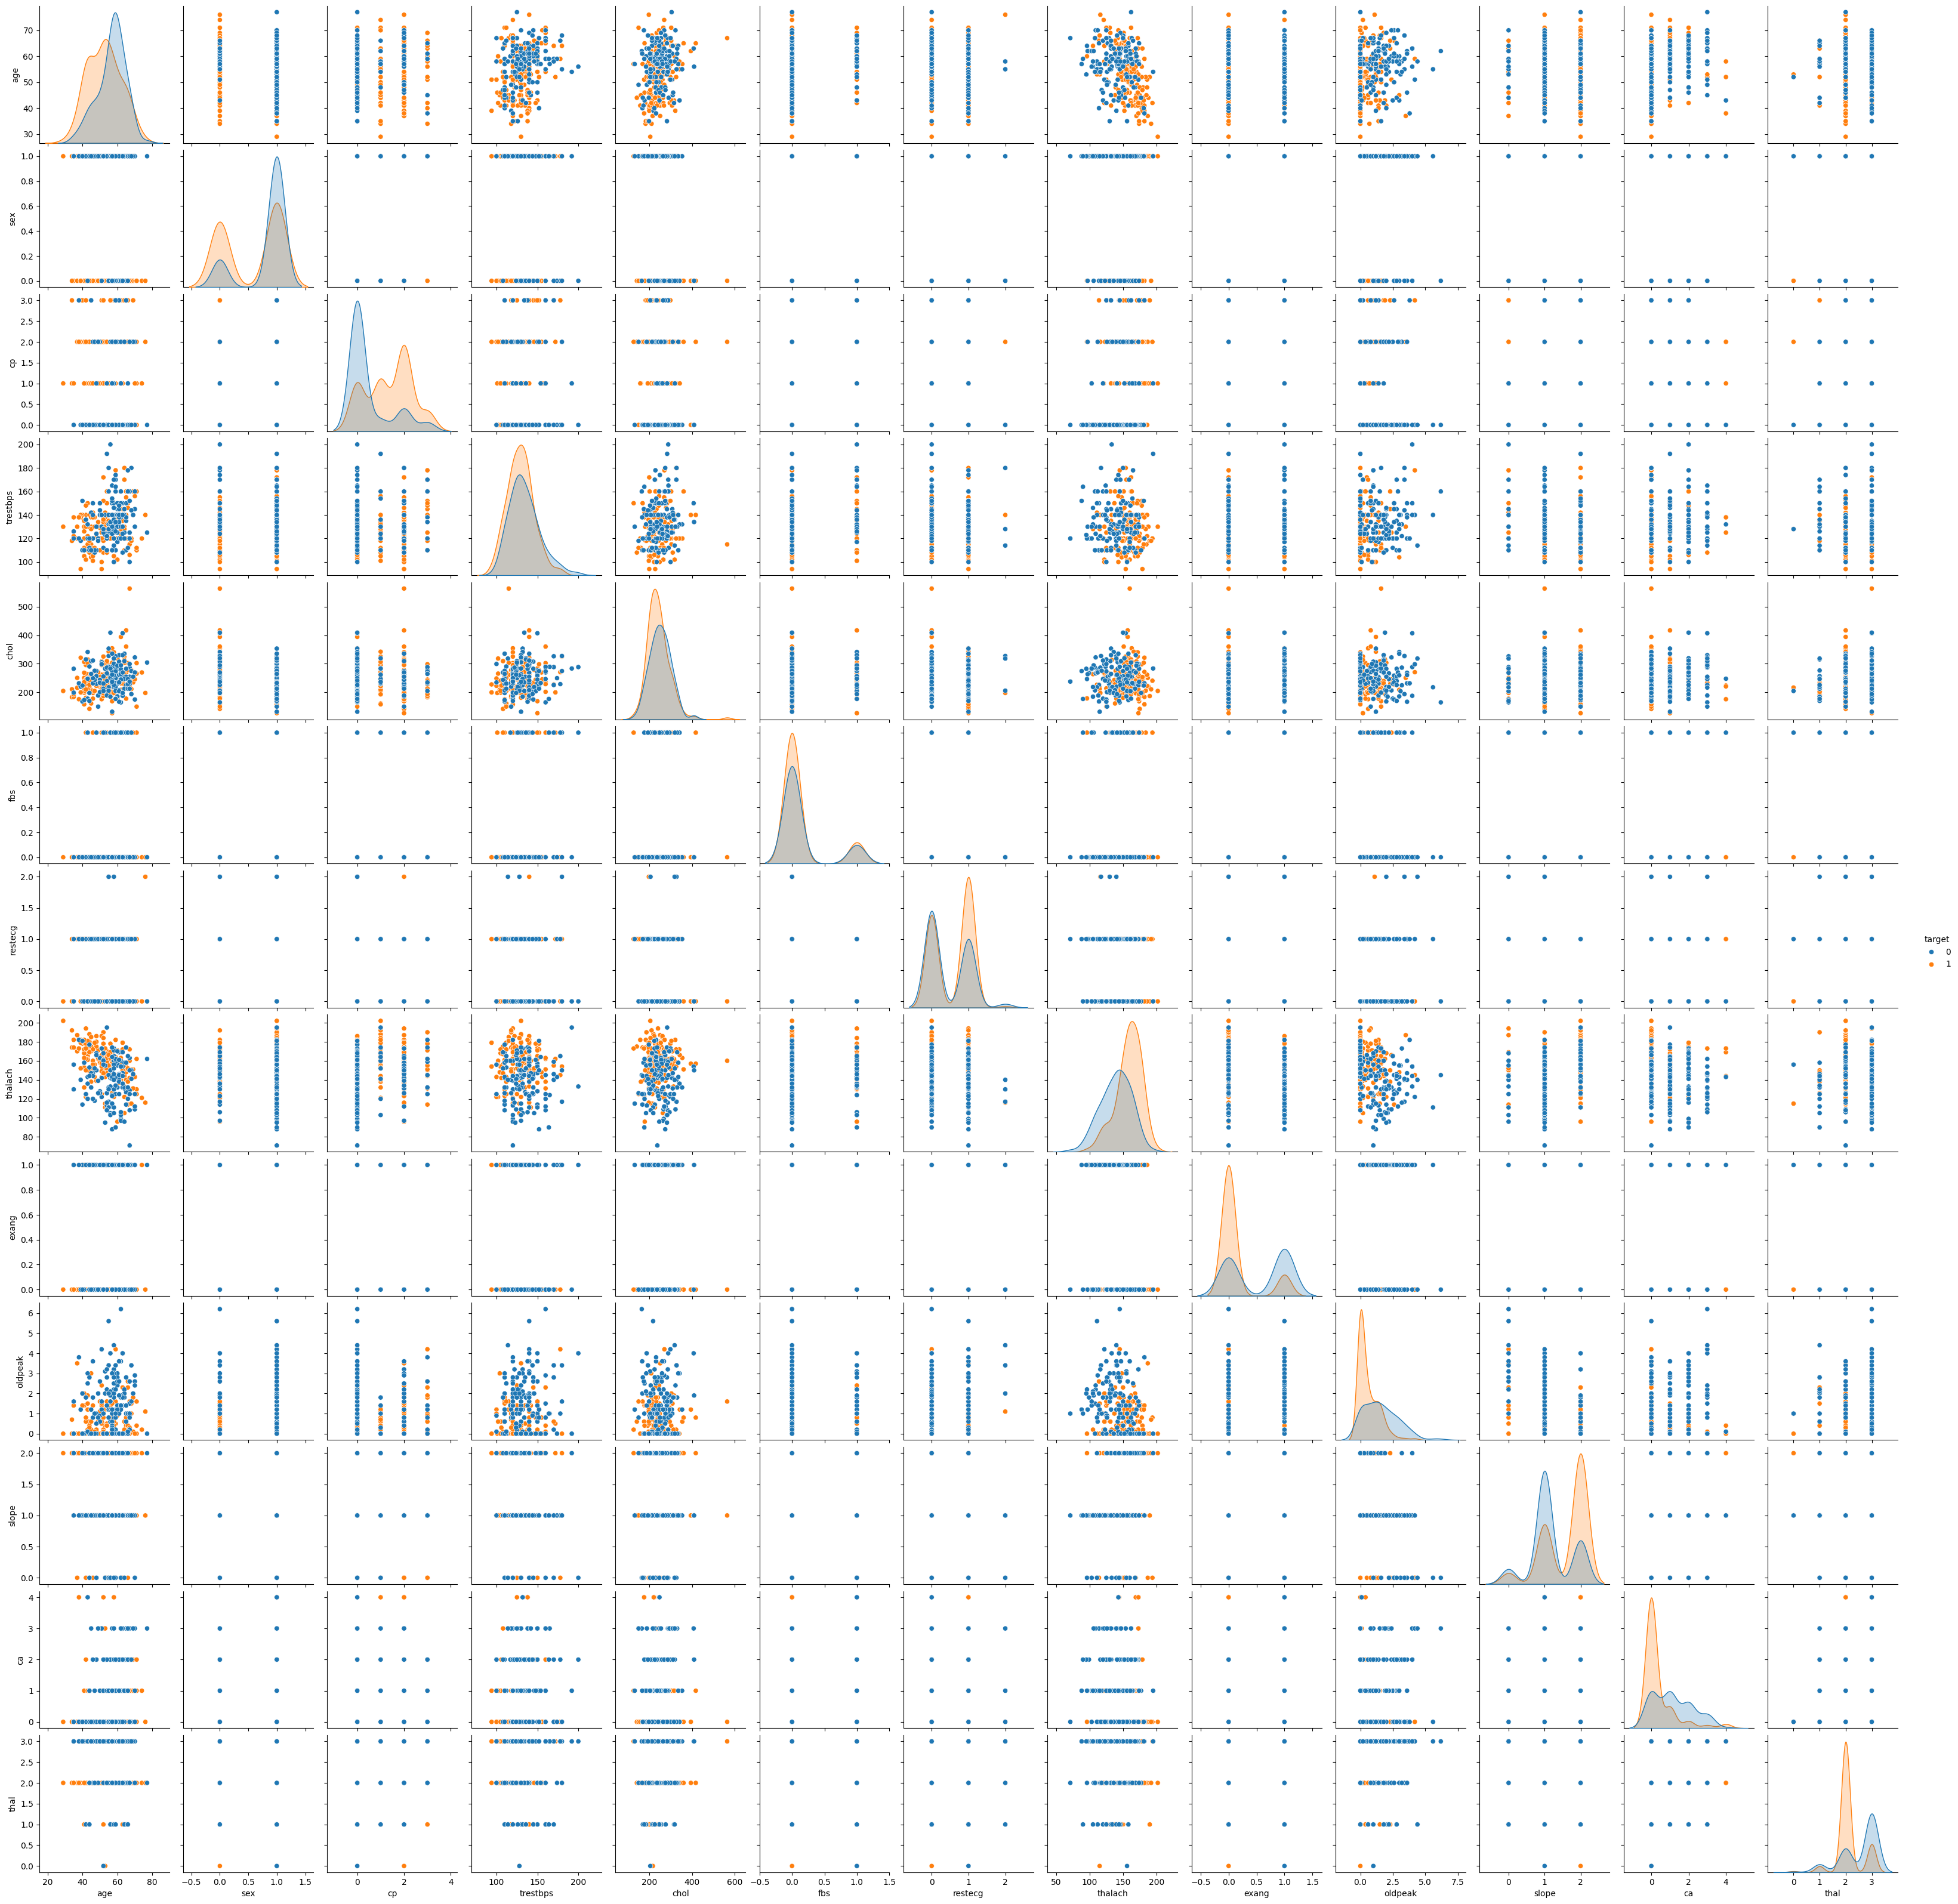

In [ ]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(df, hue='target')
plt.show()


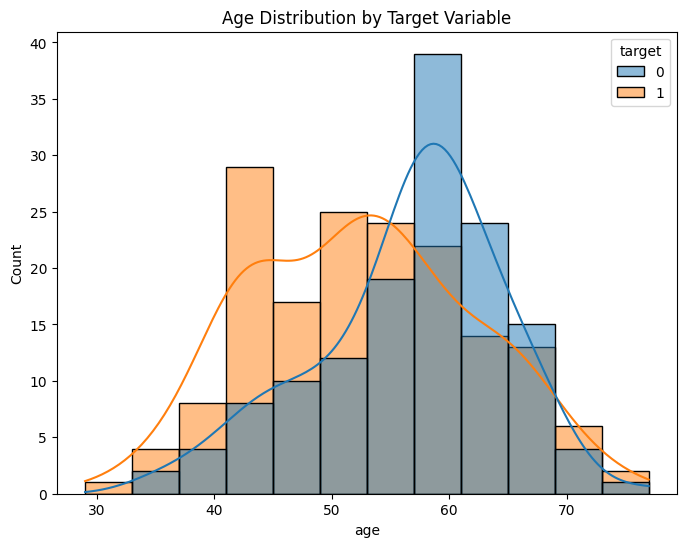

In [ ]:
# Relationship between age and heart disease
plt.figure(figsize=(8, 6))
sns.histplot(x='age', hue='target', data=df, kde=True)
plt.title('Age Distribution by Target Variable')
plt.show()


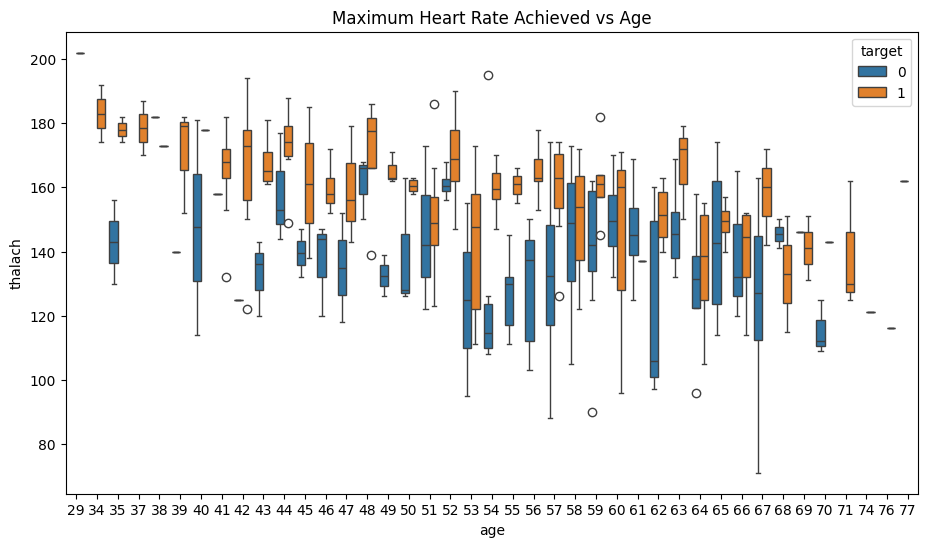

In [ ]:
# The distribution of 'thalach' (maximum heart rate achieved) across different age groups
plt.figure(figsize=(11, 6))
sns.boxplot(x='age', y='thalach', hue='target', data=df)
plt.title('Maximum Heart Rate Achieved vs Age')
plt.show()


Splitting Training and Testing data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print(X_test.shape, X_train.shape);
print(Y_test.shape, Y_train.shape)

(61, 13) (242, 13)
(61,) (242,)


Model Training

Logistic Regression

In [ ]:
model = LogisticRegression()


In [ ]:
# training the model with training data
model.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
Y_prediction = model.predict(X_test);
Y_train

,target
61,1
238,0
160,1
158,1
289,0
...,...
100,1
49,1
300,0
194,0


In [ ]:
# ACCURACY
score = accuracy_score(Y_test,Y_prediction);
print("The accuracy score is :", score)

The accuracy score is : 0.819672131147541


In [ ]:
# CONFUSION MATRIX
matrix = confusion_matrix(Y_test,Y_prediction);
print("The Confusion matrix is :", matrix)

The Confusion matrix is : [[23  5]
 [ 6 27]]


Random Forest


In [ ]:
model_1 = RandomForestClassifier()

In [ ]:
# training the model with training data
model_1.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
Y_prediction_1 = model_1.predict(X_test);
Y_train

,target
61,1
238,0
160,1
158,1
289,0
...,...
100,1
49,1
300,0
194,0


In [ ]:
# ACCURACY
score_1 = accuracy_score(Y_test,Y_prediction);
print("The accuracy score is :", score)

The accuracy score is : 0.819672131147541


In [ ]:
# CONFUSION MATRIX
matrix_1 = confusion_matrix(Y_test,Y_prediction);
print("The Confusion matrix is :", matrix)

The Confusion matrix is : [[23  5]
 [ 6 27]]


KNN(K Nearest Neighbours)

In [ ]:
model_2 = KNeighborsClassifier()

In [ ]:
model_2.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
Y_prediction_2 = model_2.predict(X_test);
Y_train

,target
61,1
238,0
160,1
158,1
289,0
...,...
100,1
49,1
300,0
194,0


In [ ]:
# ACCURACY
score_2 = accuracy_score(Y_test,Y_prediction);
print("The accuracy score is :", score)

The accuracy score is : 0.819672131147541


In [ ]:
# CONFUSION MATRIX
matrix_2 = confusion_matrix(Y_test,Y_prediction);
print("The Confusion matrix is :", matrix)

The Confusion matrix is : [[23  5]
 [ 6 27]]


Models Comparision

In [ ]:
# Logistic Regression
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred_lr = model.predict(X_test)
print("Logistic Regression:")
print(classification_report(Y_test, Y_pred_lr))

# Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train, Y_train)
Y_pred_rf = model_rf.predict(X_test)
print("\nRandom Forest:")
print(classification_report(Y_test, Y_pred_rf))

# KNN
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, Y_train)
Y_pred_knn = model_knn.predict(X_test)
print("\nKNN:")
print(classification_report(Y_test, Y_pred_knn))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61


Random Forest:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        28
           1       0.81      0.79      0.80        33

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61


KNN:
              precision    recall  f1-score   support

           0       0.59      0.57      0.58        28
           1       0.65      0.67      0.66        33

    accuracy                           0.62        61
   macro avg       0.62      0.62      0.62        61
weighted avg       0.62      0.

In [ ]:
# Store results in a dictionary
results = {
    'Logistic Regression': {
        'accuracy': accuracy_score(Y_test, Y_pred_lr),
        'confusion_matrix': confusion_matrix(Y_test, Y_pred_lr)
    },
    'Random Forest': {
        'accuracy': accuracy_score(Y_test, Y_pred_rf),
        'confusion_matrix': confusion_matrix(Y_test, Y_pred_rf)
    },
    'KNN': {
        'accuracy': accuracy_score(Y_test, Y_pred_knn),
        'confusion_matrix': confusion_matrix(Y_test, Y_pred_knn)
    }
}

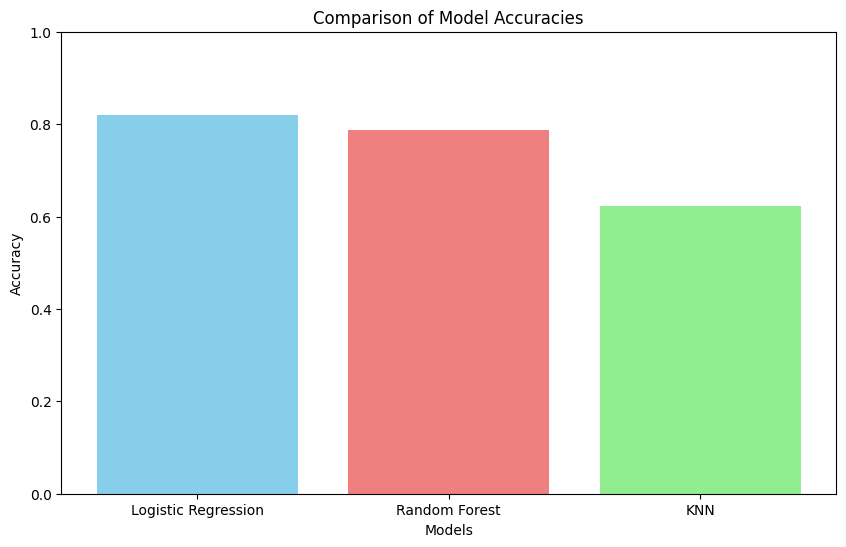

In [ ]:
model_names = list(results.keys())
accuracies = [metrics['accuracy'] for metrics in results.values()]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.show()


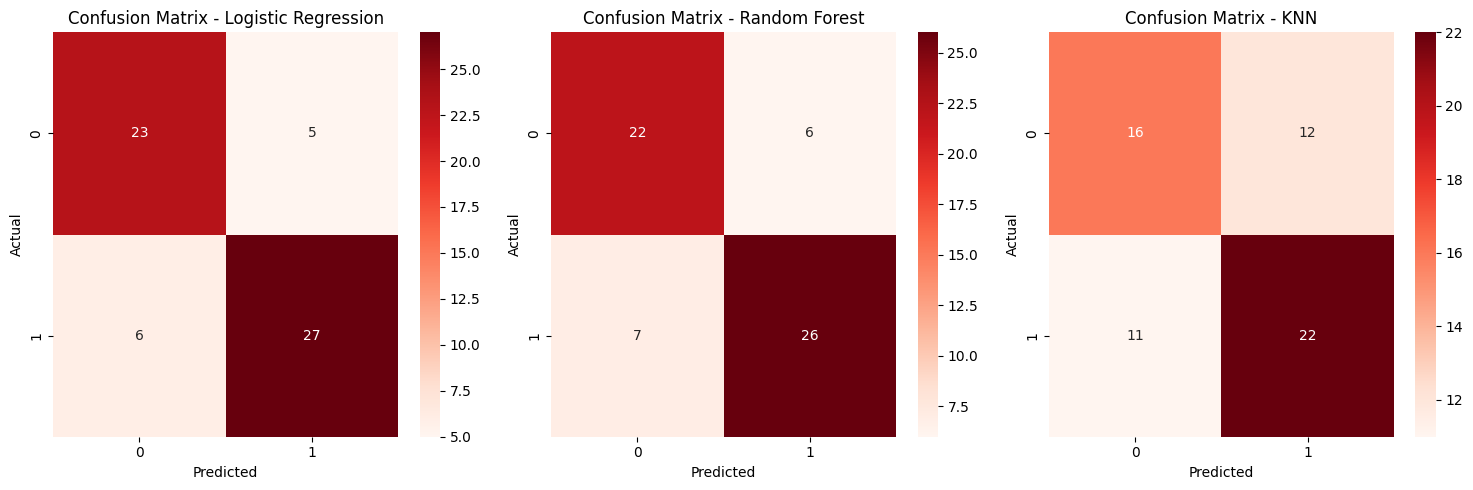

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

model_names = list(results.keys())
for i, model_name in enumerate(model_names):
    cm = results[model_name]['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {model_name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()


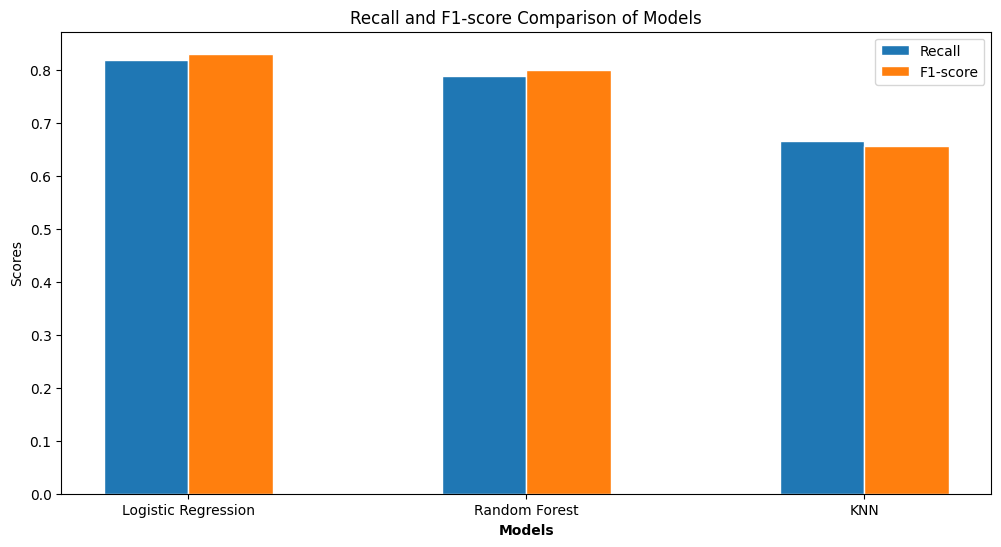

In [ ]:
report_lr = classification_report(Y_test, Y_pred_lr, output_dict=True)
report_rf = classification_report(Y_test, Y_pred_rf, output_dict=True)
report_knn = classification_report(Y_test, Y_pred_knn, output_dict=True)

models = {
    'Logistic Regression': report_lr,
    'Random Forest': report_rf,
    'KNN': report_knn
}

recall_scores = []
f1_scores = []
model_names = []

for model_name, report in models.items():
    recall_scores.append(report['1']['recall'])
    f1_scores.append(report['1']['f1-score'])
    model_names.append(model_name)

barWidth = 0.25
r1 = np.arange(len(recall_scores))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(12, 6))
plt.bar(r1, recall_scores, width=barWidth, edgecolor='white', label='Recall')
plt.bar(r2, f1_scores, width=barWidth, edgecolor='white', label='F1-score')

plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth / 2 for r in range(len(recall_scores))], model_names)
plt.ylabel('Scores')
plt.title('Recall and F1-score Comparison of Models')
plt.legend()
plt.show()


Building A Predictive System

In [ ]:
def predict_heart_disease():
    input_data = []
    features = [
        "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
        "exang", "oldpeak", "slope", "ca", "thal"
    ]
    for feature in features:
        while True:
            try:
                value = float(input(f"Enter {feature}: "))
                input_data.append(value)
                break
            except ValueError:
                print("Invalid input. Please enter a number.")

    arr = np.array(input_data)
    # Logistic Regression Prediction
    lr_prediction = model.predict(arr.reshape(1, -1))

    # Random Forest Prediction
    rf_prediction = model_1.predict(arr.reshape(1, -1))

    # KNN Prediction
    knn_prediction = model_2.predict(arr.reshape(1, -1))

    predictions = {
        "Logistic Regression": lr_prediction[0],
        "Random Forest": rf_prediction[0],
        "KNN": knn_prediction[0]
    }

    # Example: Simple majority voting
    if sum(predictions.values()) >= 2 :
        final_prediction = 1
    else:
        final_prediction = 0

    if final_prediction == 0:
        print("Based on the model predictions, you are likely healthy.")
    else:
        print("Based on the model predictions, you may have a heart problem. Consultation is advised.")

    return predictions, final_prediction

predictions, final_prediction = predict_heart_disease() # Removed input_data argument

print("Individual Model Predictions:", predictions)
print("Final Prediction (Majority Vote):", final_prediction)

Enter age: 57
Enter sex: 1
Enter cp: 3
Enter trestbps: 140
Enter chol: 193
Enter fbs: 0
Enter restecg: 1
Enter thalach: 115
Enter exang: 1
Enter oldpeak: 1.2
Enter slope: 1
Enter ca: 0
Enter thal: 2
Based on the model predictions, you may have a heart problem. Consultation is advised.
Individual Model Predictions: {'Logistic Regression': np.int64(1), 'Random Forest': np.int64(1), 'KNN': np.int64(0)}
Final Prediction (Majority Vote): 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Analyzing the confusion matrix to understand model performance
tn, fp, fn, tp = confusion_matrix(Y_test, Y_prediction).ravel()
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)
print("True Positives (TP):", tp)

# Calculate sensitivity (recall) and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)

True Negatives (TN): 23
False Positives (FP): 5
False Negatives (FN): 6
True Positives (TP): 27
Sensitivity (Recall): 0.8181818181818182
Specificity: 0.8214285714285714
